In [1]:
import dlib
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
landmark_model_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/models/shape_predictor_68_face_landmarks.dat'

In [3]:
detector_hog = dlib.get_frontal_face_detector()

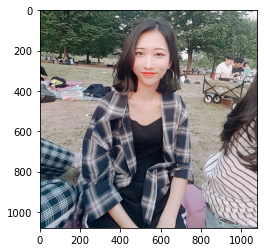

In [4]:
my_image_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/test.jpg'

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [5]:
bbox = detector_hog(img_rgb, 1)
print(bbox)

rectangles[[(448, 180) (634, 366)]]


In [6]:
for i in bbox:
    left, top, right, bottom = i.left(), i.top(), i.right(), i.bottom()
    print(left, top, right, bottom)
    
    cv2.rectangle(img_show, (left, top), (right, bottom), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
# plt.show()

448 180 634 366


In [7]:
landmark_predictor = dlib.shape_predictor(landmark_model_path)

In [8]:
list_landmarks = []
for i in bbox:
    points = landmark_predictor(img_rgb, i)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


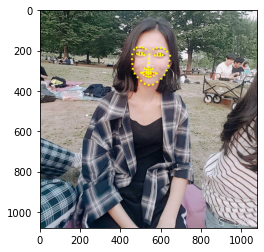

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_bgr, point, 5, (0, 255, 255), -1)

img_ = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_)
plt.show()

In [13]:
image = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
cv2.imwrite('output/test_landmark.jpg', image)

True